In [1]:
!cd ../yolov3 && git checkout ./

### 引用yolov3

In [2]:
import sys
sys.path.append("../yolov3")

### select device

In [3]:
from utils.torch_utils import select_device    
device = select_device('cpu')     
device 

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
YOLOv3 🚀 v9.6.0-17-g3508a98 torch 1.11.0+cu102 CPU



device(type='cpu')

### DetectMultiBackend

In [4]:
from models.common import DetectMultiBackend     
m = DetectMultiBackend('../yolov3/yolov3.pt', device=device, dnn=False)     
m_f= m.model.float()     
print(type(m))     
m_m = m.model    
print(type(m_m))     
m_m_f = m_m.float()     
print(type(m_m_f)) 

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
<class 'models.common.DetectMultiBackend'>
<class 'models.yolo.Model'>
<class 'models.yolo.Model'>


In [5]:
print(m_m_f)

Model(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): Bottleneck(
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
    )
    (3): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (4): Sequential(
      (0): Bottleneck(
        (cv1): Conv(
          (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padd

### display

7


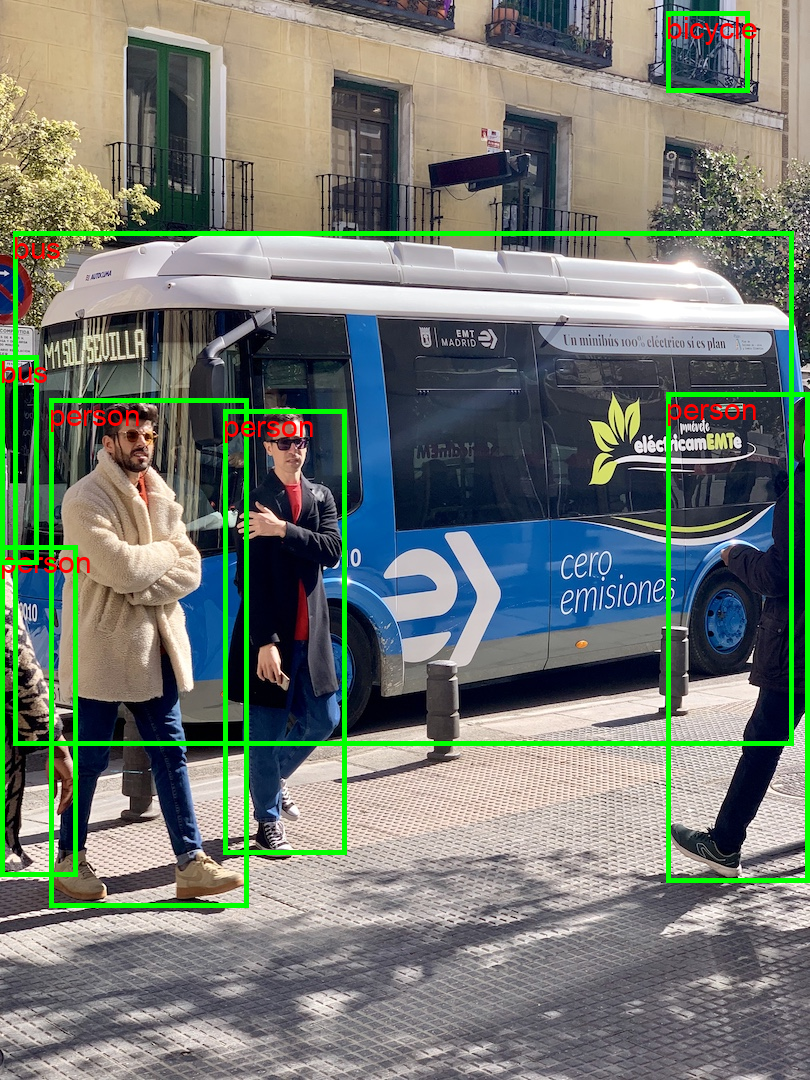

In [6]:
import torch
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from utils.general import non_max_suppression

font = ImageFont.truetype("/root/.config/Ultralytics/Arial.ttf", 30)
image = Image.open("/work/yolov3/data/images/bus.jpg")
draw = ImageDraw.Draw(image)
w = 640 if image.width > image.height else int(image.width * 640 / image.height) 
h = 640 if image.height > image.width else int(image.height * 640 / image.width) 
img = np.asarray(image.resize((w, h)))
img = img.transpose((2, 0, 1))
img = np.ascontiguousarray(img)
im = torch.from_numpy(img).to(device)
im = im.float()
im /= 255 
im = im[None]
pred = m_m_f(im, augment=False, visualize=False)[0]
pred = non_max_suppression(pred, 0.25, 0.45, None, False, max_det=1000)
print(len(pred[0]))
for i, det in enumerate(pred):
    if len(det):
        for *xyxy, conf, cls in det:
            x1 = int(xyxy[0] * image.width / w)
            y1 = int(xyxy[1] * image.height / h)
            x2 = int(xyxy[2] * image.width / w)
            y2 = int(xyxy[3] * image.height / h)
            draw.rectangle([x1,y1,x2,y2],outline=(0,255,0),width=5)
            draw.text((x1,y1),m_m_f.names[int(cls)],font=font,fill=(255,0,0))
image.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c27263b-a773-4b36-bc5c-6cb959f3ea6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>